# df결합정리
## csv파일을 로드해서 결합
---
- 1. csv 폴더에 transaction_1, transaction_2, transaction_detail_1, transaction_detail_2 파일 4개를 로드
- 2. transaction_1, transaction_2 데이터프레임을 단순한 행결합(concat)
- 3. transaction_detail_1, transaction_detail_2 데이터프레임도 단순한 행결합(concat)
- 4. 2번 과정에서 나온 df와 3번과정에서 나온 df를 특정 조건을 가지고 열 결합!(특정조건은 찾아보라)

In [96]:
import pandas as pd

df_ts1 = pd.read_csv("../csv/transaction_1.csv")
df_ts2 = pd.read_csv("../csv/transaction_2.csv")
df_tsd1 = pd.read_csv("../csv/transaction_detail_1.csv")
df_tsd2 = pd.read_csv("../csv/transaction_detail_2.csv")

In [97]:
#2
df_ts_cc = pd.concat([df_ts1, df_ts2], axis=0, ignore_index=True)
df_tsd_cc = pd.concat([df_tsd1, df_tsd2], axis=0, ignore_index=True)

# print(df_ts_cc)
# print(df_tsd_cc)


In [98]:
df_ts_merge = pd.merge(df_ts_cc, df_tsd_cc, on='transaction_id', how='inner')
df_ts_merge["payment_date"] = pd.to_datetime(df_ts_merge["payment_date"])
df_ts_merge

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,2,S003,1
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,4,S002,2
...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,7139,S004,1
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,7140,S002,1
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,7141,S001,2
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,7142,S002,1


## 데이터결합2
- 1. customer_master, item_master 파일 로드
- 2. join_data 특정 조건에 맞게 열 추가
- 3. 결합이 된 데이터에서 quantitiy컬럼, item_price컬럼 존재. 두개의 곱을 하여 새로운 파생변수 "total_price" 생성

In [99]:
df_cm = pd.read_csv("../csv/customer_master.csv")
df_im = pd.read_csv("../csv/item_master.csv")

In [100]:
df_ts_merge = pd.merge(df_ts_merge, df_im, on='item_id', how='right')
df_ts_merge

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name,item_price
0,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000
1,T0000000120,50000,2019-02-01 06:22:39,IK624245,7,S001,1,PC-A,50000
2,T0000000123,50000,2019-02-01 09:32:27,OA336650,10,S001,1,PC-A,50000
3,T0000000129,50000,2019-02-01 18:08:59,TS146087,16,S001,1,PC-A,50000
4,T0000000134,150000,2019-02-01 22:08:51,TS701801,21,S001,3,PC-A,50000
...,...,...,...,...,...,...,...,...,...
7139,T0000006886,210000,2019-07-31 19:15:25,OA917517,7131,S005,1,PC-E,210000
7140,T0000006887,210000,2019-07-31 19:43:42,AS961301,7132,S005,1,PC-E,210000
7141,T0000006888,210000,2019-07-31 20:05:45,GD025393,7133,S005,1,PC-E,210000
7142,T0000006889,210000,2019-07-31 20:07:22,IK088821,7134,S005,1,PC-E,210000


In [102]:
df_ts_merge = pd.merge(df_ts_merge, df_cm, on='customer_id', how='left')
df_ts_merge = pd.merge(df_ts_merge, df_im, on='item_id', how='left')
df_ts_merge

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,item_name_x,item_price_x,customer_name_x,...,item_price_y,customer_name_y,registration_date_y,email_y,gender_y,age_y,birth_y,pref_y,item_name,item_price
0,T0000000114,50000,2019-02-01 01:37:23,HD678019,1,S001,1,PC-A,50000,김영웅,...,50000,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,PC-A,50000
1,T0000000120,50000,2019-02-01 06:22:39,IK624245,7,S001,1,PC-A,50000,김다원,...,50000,김다원,2019-01-16 7:24,ezaki_girolamo@example.com,M,67,1951-08-24,서울특별시,PC-A,50000
2,T0000000123,50000,2019-02-01 09:32:27,OA336650,10,S001,1,PC-A,50000,김지훈,...,50000,김지훈,2019-01-01 15:57,yasuda_naoto@example.com,M,68,1950-08-13,대전광역시,PC-A,50000
3,T0000000129,50000,2019-02-01 18:08:59,TS146087,16,S001,1,PC-A,50000,김세찬,...,50000,김세찬,2019-01-29 13:34,jinbo_haruka@example.com,F,48,1970-09-27,인천광역시,PC-A,50000
4,T0000000134,150000,2019-02-01 22:08:51,TS701801,21,S001,3,PC-A,50000,김찬빈,...,50000,김찬빈,2019-01-22 9:33,umezawa_sayuri@example.com,F,76,1942-09-28,서울특별시,PC-A,50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006886,210000,2019-07-31 19:15:25,OA917517,7131,S005,1,PC-E,210000,이나혜,...,210000,이나혜,2019-03-14 8:55,morikawa_maho@example.com,F,48,1970-09-17,서울특별시,PC-E,210000
7140,T0000006887,210000,2019-07-31 19:43:42,AS961301,7132,S005,1,PC-E,210000,정민승,...,210000,정민승,2019-07-29 23:10,yasunaga_kimiko@example.com,F,58,1960-08-20,광주광역시,PC-E,210000
7141,T0000006888,210000,2019-07-31 20:05:45,GD025393,7133,S005,1,PC-E,210000,김다훈,...,210000,김다훈,2019-01-29 0:46,hirota_reina@example.com,F,61,1958-04-09,대전광역시,PC-E,210000
7142,T0000006889,210000,2019-07-31 20:07:22,IK088821,7134,S005,1,PC-E,210000,최유정,...,210000,최유정,2019-06-09 20:24,abe_hikari@example.com,F,51,1968-01-08,인천광역시,PC-E,210000


In [78]:
df_ts_merge["total_price"] = df_ts_merge["quantity"] * df_ts_merge["item_price"]

In [79]:
df_ts_merge["payment_date"]
# df_ts_merge["payment_date"][0].month
# df_ts_merge["payment_date"][0].year

0      2019-02-01 01:36:57
1      2019-02-01 01:37:23
2      2019-02-01 02:34:19
3      2019-02-01 02:47:23
4      2019-02-01 04:33:46
               ...        
7139   2019-07-31 21:20:44
7140   2019-07-31 21:52:48
7141   2019-07-31 23:35:25
7142   2019-07-31 23:39:35
7143   2019-07-31 23:41:38
Name: payment_date, Length: 7144, dtype: datetime64[ns]

> 날짜 추출
- dt.strftime("~")

In [80]:
#년월추출방법1
df_ts_merge["payment_date"].dt.strftime("%Y-%m")

0       2019-02
1       2019-02
2       2019-02
3       2019-02
4       2019-02
         ...   
7139    2019-07
7140    2019-07
7141    2019-07
7142    2019-07
7143    2019-07
Name: payment_date, Length: 7144, dtype: object

In [81]:
#년월추출방법2
df_ts_merge["payment_month"] = df_ts_merge["payment_date"]
for i in range(len(df_ts_merge["payment_date"])):
    df_ts_merge["payment_month"][i] = str(df_ts_merge["payment_date"][i].year) + "년" + str(df_ts_merge["payment_date"][i].month) + "월"

/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_66823/3782472271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts_merge["payment_month"][i] = str(df_ts_merge["payment_date"][i].year) + "년" + str(df_ts_merge["payment_date"][i].month) + "월"
/var/folders/x3/lny9bbwx64b561c29r4y4z400000gn/T/ipykernel_66823/3782472271.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts_merge["payment_month"][i] = str(df_ts_merge["payment_date"][i].year) + "년" + str(df_ts_merge["payment_date"][i].month) + "월"


In [82]:
df_ts_merge["payment_month"]

0       2019년2월
1       2019년2월
2       2019년2월
3       2019년2월
4       2019년2월
         ...   
7139    2019년7월
7140    2019년7월
7141    2019년7월
7142    2019년7월
7143    2019년7월
Name: payment_month, Length: 7144, dtype: object

In [91]:
df_ts_merge_month = df_ts_merge.groupby("payment_month").sum()

"""거래내역자료라서 mean()을 해버리면 안된다."""

In [88]:
df_ts_merge_month["total_price"]

payment_month
2019년2월    160185000
2019년3월    160370000
2019년4월    160510000
2019년5월    155420000
2019년6월    164030000
2019년7월    170620000
Name: total_price, dtype: int64

In [ ]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

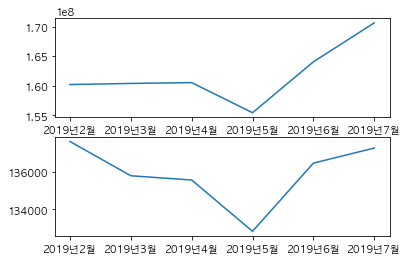

In [94]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot(df_ts_merge_month["total_price"])
plt.show